# Análisis datos deconsumo energético a nivel mundial

Vamos a leer el archivo "energia.csv". Revisemos el archivo directamente.

Objetivo:

1. Obtener el total de generación de energía eléctrica de un país en un rango de tiempo
2. Comparar gráficamente la generación energética de varios paises
3. Visualizar gráficamente la participación de cada tipo de generación de energía (% eólica, % hidroeléctrica, etc)

Los encabezados de los datos que me interesan son:

columna | descripción
-|-
country |	Geographic location
year|	Year of observation
carbonintensityelec	|Carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour
coal_production	|Coal production, measured in terawatt-hours
electricity_generation	|Electricity generation, measured in terawatt-hours
biofuel_electricity	|Electricity generation from biofuels, measured in terawatt-hours
coal_electricity	|Electricity generation from coal, measured in terawatt-hours
fossil_electricity	|Electricity generation from fossil fuels, measured in terawatt-hours. This is the sum of electricity generation from coal, oil and gas.
gas_electricity	|Electricity generation from gas, measured in terawatt-hours
hydro_electricity	|Electricity generation from hydropower, measured in terawatt-hours
nuclear_electricity	|Electricity generation from nuclear power, measured in terawatt-hours
oil_electricity	|Electricity generation from oil, measured in terawatt-hours
renewables_electricity	|Electricity generation from renewables, measured in terawatt-hours
solar_electricity	|Electricity generation from solar, measured in terawatt-hours
wind_electricity	|Electricity generation from wind, measured in terawatt-hours
gas_production	|Gas production, measured in terawatt-hours
oil_production	|Oil production, measured in terawatt-hours
population	|Total population

*Fuente: https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption*

In [2]:
import pandas as pd

## Limpieza de datos

Debemos remover filas con campos vacíos (NaN) en la columna de Energía.

In [3]:
# Leer el archivo csv
energiaDf = pd.read_csv("energia.csv",delimiter=",")
# Crear un DataFrame que sólo contenga los campos necesarios
energiaDf = energiaDf[['country',
                       'year',
                       'electricity_generation',
                       'population']]

# Encontrar índices de las entradas completas (sin NaN o Null) en la columna 'biofuel_electricity'
noNulos = energiaDf[pd.notnull(energiaDf['electricity_generation'])].index
# Crear el dataframe SOLO con los no nulos (usando los índices que acabamos de encontrar)
energiaDf = energiaDf.iloc[noNulos] # deja las entradas no nulas en columna biofuel_electricity
energiaDf

,country,year,electricity_generation,population
100,Afghanistan,2000,0.467,20780000.0
101,Afghanistan,2001,0.592,21607000.0
102,Afghanistan,2002,0.687,22601000.0
103,Afghanistan,2003,0.939,23681000.0
104,Afghanistan,2004,0.894,24727000.0
...,...,...,...,...
17427,Zimbabwe,2015,9.388,13815000.0
17428,Zimbabwe,2016,6.826,14030000.0
17429,Zimbabwe,2017,7.310,14237000.0
17430,Zimbabwe,2018,9.133,14439000.0


## Filtrado de datos

Vamos a generar un DataFrame que solo contenga información de un solo país, y por cierto rango de años

In [14]:
pais = "Colombia"
anio = 1990
# Busco las entradas que tengan "pais" en la columna "country"
energiaPais = energiaDf.loc[(energiaDf['country'] == pais) & 
                           (energiaDf['year'] >= anio)]
energiaPais

,country,year,electricity_generation,population
3556,Colombia,1990,38.246,33103000.0
3557,Colombia,1991,40.124,33758000.0
3558,Colombia,1992,36.613,34423000.0
3559,Colombia,1993,41.691,35091000.0
3560,Colombia,1994,45.024,35759000.0
3561,Colombia,1995,47.483,36421000.0
3562,Colombia,1996,48.371,37076000.0
3563,Colombia,1997,49.906,37724000.0
3564,Colombia,1998,50.283,38364000.0
3565,Colombia,1999,47.775,38999000.0


Ahora vamos a seleccionar varios paises

In [19]:
paises = ["Colombia","China","United States","Japan","Germany"]
anio = 1990
# Busco las entradas que tengan "pais" en la columna "country"
energiaPaises = energiaDf.loc[(energiaDf['country'].isin(paises)) &
                              (energiaDf['year'] >= anio)]
energiaPaises

,country,year,electricity_generation,population
3435,China,1990,621.200,1.176884e+09
3436,China,1991,677.550,1.192897e+09
3437,China,1992,753.940,1.206711e+09
3438,China,1993,811.590,1.218817e+09
3439,China,1994,927.800,1.230020e+09
...,...,...,...,...
16365,United States,2016,4095.487,3.230160e+08
16366,United States,2017,4058.261,3.250850e+08
16367,United States,2018,4203.937,3.270960e+08
16368,United States,2019,4161.834,3.290650e+08


Si necesito visualizar todo el DataFrame, puedo convertirlo en String y luego imprimirlo con print.

<span class="mark">Precaución: solo imprimir si el DataFrame es pequeño</span>

In [20]:
print(energiaPaises.to_string())

             country  year  electricity_generation    population
3435           China  1990                 621.200  1.176884e+09
3436           China  1991                 677.550  1.192897e+09
3437           China  1992                 753.940  1.206711e+09
3438           China  1993                 811.590  1.218817e+09
3439           China  1994                 927.800  1.230020e+09
3440           China  1995                1007.030  1.240921e+09
3441           China  1996                1081.310  1.251636e+09
3442           China  1997                1135.550  1.261996e+09
3443           China  1998                1167.000  1.271982e+09
3444           China  1999                1239.300  1.281515e+09
3445           China  2000                1319.101  1.290551e+09
3446           China  2001                1463.931  1.299130e+09
3447           China  2002                1634.137  1.307352e+09
3448           China  2003                1858.612  1.315304e+09
3449           China  200

## Presentación de datos básica con Pandas

### Gráfico de línea

Vamos a generar nuestra primera gráfica de línea para la generación de energía eléctrica de un país individual (en Tera Watts).

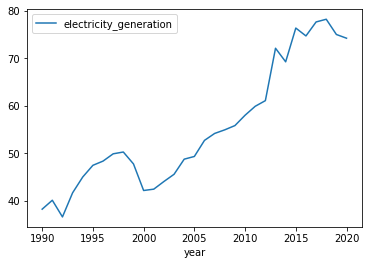

In [31]:
# Generación de gráfica directamente con pandas
ax = energiaPais.plot.line(x='year',y='electricity_generation')

Esta es útil para graficar tendencias o datos que tienen una variable independiente incremental (usualmente el tiempo).

### Otros tipos de gráficos incorporados

Para un DataFrame, para el ejemplo nombrado "df", los principales tipos de gráficos incorporados son:

- df.plot.bar
- df.plot.barh
- df.plot.density
- df.plot.hist
- df.plot.scatter
- df.plot.box
- df.plot.hexbin
- df.plot.pie
- df.plot.area

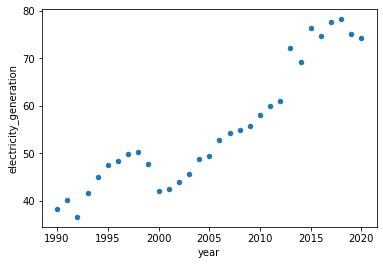

In [51]:
# Pruebe aquí los distintos tipos de gráficos
ax = energiaPais.plot.scatter(x='year',y='electricity_generation')

Si intentamos usar estas gráficas para el DataFrame que tiene varios paises

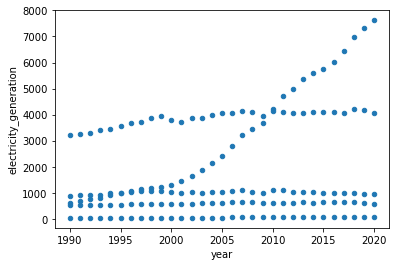

In [58]:
# Pruebe aquí los distintos tipos de gráficos
ax = energiaPaises.plot.scatter(x='year',y='electricity_generation')

Después de probar varios tipos de gráficas, notamos que nuestro dataset está configurado de tal forma que las columnas son compartidas por todos los países. Si queremos comparar los datos de cada país, debemos tener segmentados los datos completos por país. Para realizar análisis gráfico, podemos generar un DataFrame por país, el cual contenga todos los datos asociados a este.

## Segmentación por valores

Para esto podemos usar un ciclo For que itere sobre la lista de paises, y en cada iteración, genere un DataFrame para cada país encontrado:

In [70]:
paisesDf = []
for pais in paises:
    paisesDf.append(energiaDf[(energiaDf['country'] == pais) & (energiaDf['year'] >= anio)])

paisesDf

[       country  year  electricity_generation  population
 3556  Colombia  1990                  38.246  33103000.0
 3557  Colombia  1991                  40.124  33758000.0
 3558  Colombia  1992                  36.613  34423000.0
 3559  Colombia  1993                  41.691  35091000.0
 3560  Colombia  1994                  45.024  35759000.0
 3561  Colombia  1995                  47.483  36421000.0
 3562  Colombia  1996                  48.371  37076000.0
 3563  Colombia  1997                  49.906  37724000.0
 3564  Colombia  1998                  50.283  38364000.0
 3565  Colombia  1999                  47.775  38999000.0
 3566  Colombia  2000                  42.177  39630000.0
 3567  Colombia  2001                  42.461  40256000.0
 3568  Colombia  2002                  44.073  40875000.0
 3569  Colombia  2003                  45.594  41484000.0
 3570  Colombia  2004                  48.778  42076000.0
 3571  Colombia  2005                  49.347  42648000.0
 3572  Colombi

Ahora ya tenemos un DataFrame por pais, tratemos de graficar varios países en una misma gráfica

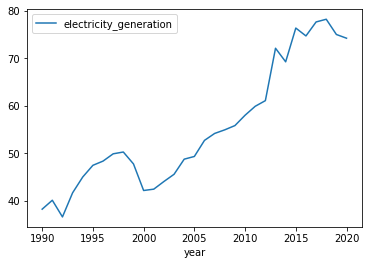

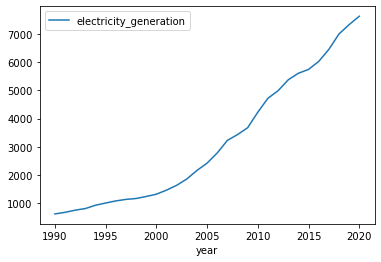

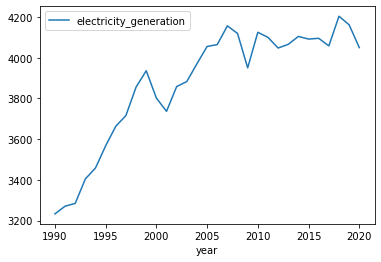

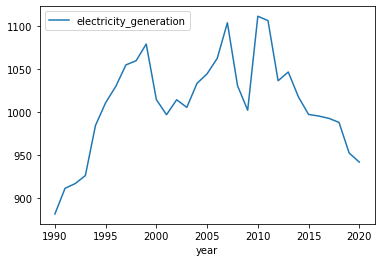

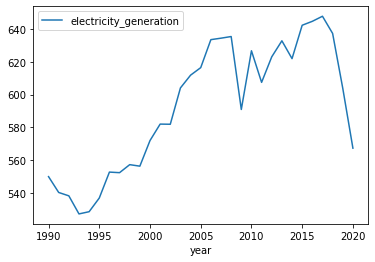

In [76]:
for paisDf in paisesDf:
    paisDf.plot.line(x='year',y='electricity_generation')

Como vemos, no resolvemos el problema, ya que cada llamado a df.plot.line() crea un lienzo nuevo.

Si queremos configurar las gráficas a nuestro gusto, debemos usar el módulo **matplotlib**, lo cual veremos en el siguiente cuaderno.

## Análisis

Vamos a crear un nuevo DataFrame con los cálculos estadísticos básicos. Para esto generamos los estadísticos con df.describe() para cada DataFrame, nuevamente necesitamos un ciclo for 

In [91]:
estadisticos = pd.DataFrame({}) 
for paisDf in paisesDf:
    pd.concat([estadisticos,paisDf.describe()],axis=1)


## Personalización de gráficas con matplotlib

Para la generación de gráficas, *pandas* incorpora el módulo de gráficos **matplotlib**, por lo que si queremos acceder a configuraciones adicionales de las gráfdicas como las etiquetas y leyenda, debemos aprender a utilizarlo

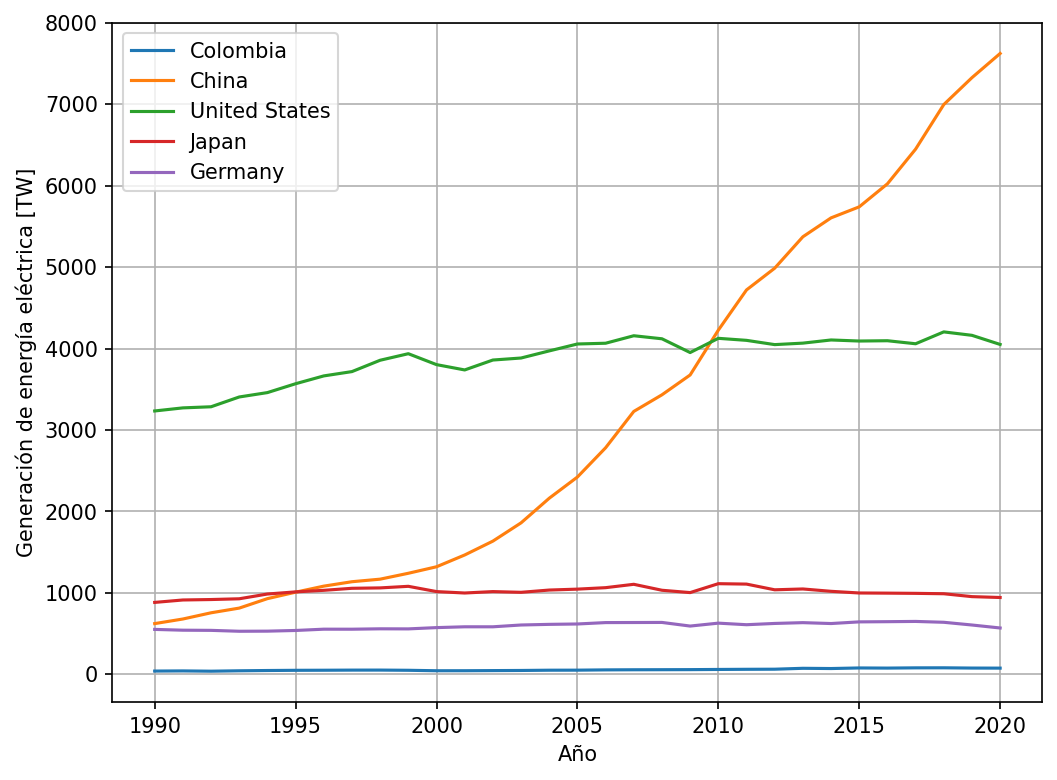

In [81]:
import matplotlib.pyplot as plt

# Creamos el "lienzo" donde se pondrán las gráficas, luego los ejes ("ax")
# Se define un tamaño y resolución, para que se vea más bonita la figura
fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
# Generamos la gráfica
for paisDf in paisesDf:
    paisDf.plot.line(x='year',y='electricity_generation',ax=ax)
# Etiqueta del eje x
ax.set_xlabel("Año")
# Etiqueta del eje y
ax.set_ylabel("Generación de energía eléctrica [TW]")
# Leyenda
ax.legend(paises)
# Cuadrícula
plt.grid()